# Probability

### 2-1. $\textit{[3]}$ Suppose that 80% of people like peanut butter, 89% like jelly, and 78% like both. Given that a randomly sampled person like peanut butter, what is the probability that she also likes jelly?
---

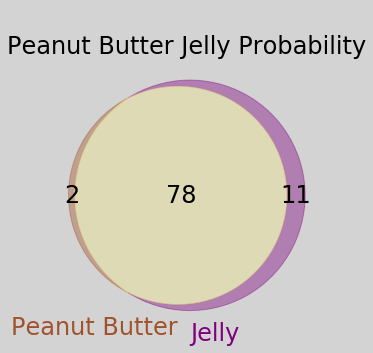

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

probPB = 80
probJ = 89
probBoth = 78

fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('lightgray')
v = venn2(subsets = (probPB-probBoth, probJ-probBoth, probBoth))

for text in v.set_labels:
    text.set_fontsize(24)
for text in v.subset_labels:
    text.set_fontsize(24)

plt.title('\nPeanut Butter Jelly Probability', fontsize=24)
v.get_label_by_id('A').set_text('Peanut Butter')
v.get_label_by_id('A').set_color('sienna')
v.get_patch_by_id('A').set_color('sienna')



v.get_label_by_id('B').set_text('Jelly')
v.get_label_by_id('B').set_color('Purple')
v.get_patch_by_id('B').set_color('Purple')

v.get_patch_by_id('11').set_color('khaki')

plt.show()

# Givens
### $P(Jelly) = \frac{89}{100}$ 
### $P(Peanut\ Butter) = \frac{80}{100}$
### $P(Jelly\ \cap\ Peanut\ Butter) = \frac{78}{100}$
---
# Fomula to find probability of A given B
# $P(Jelly\ |\ Peanut\ Butter) = \frac{P(Jelly\ \cap\ Peanut\ Butter)}{P(Peanut\ Butter)}$
---
# Solution!
## $P(Jelly\ |\ Peanut\ Butter) = \frac{\frac{78}{100}}{\frac{80}{100}} = \frac{78}{80} = 0.975$

### 2-2. $\textit{[3]}$ Suppose that $P(A)=0.3$ and $P(B)=0.7$.

a) Can you compute $P(A\ and\ B)$ if you only know $P(A)$ and $P(B)$?

b) Assuming that events $A$ and $B$ arise from independent random processes:

- What is $P(A\ and\ B)$?
- What is $P(A\ or\ B)$?
- What is $P(A|B)$?

---

a) If and only if events $A$ and $B$ are $\textit{independent}$ can we find $P(A\ and\ B)$. 

b) Givens: $P(A)=0.3$, $P(B)=0.7$

---
- $P(A\ and\ B) = P(A\ \cap\ B) = P(A) * P(B|A)$ 

    $ Since\ A\ and\ B\ are\ \textit{independent}:$
    
    $P(A\ and\ B) = P(A) * P(B|A) = P(A) * P(B)$ 

    $P(A\ and\ B) = 0.3 * 0.7 = 0.21$

---
- $P(A\ or\ B) = P(A\ \cup\ B) = P(A) + P(B) - P(A\ \cap\ B)$
   
    $ Since\ A\ and\ B\ are\ \textit{independent}:$
    
    $P(A\ or\ B) = P(A) + P(B) - P(A)*P(B)$

    $P(A\ or\ B) = 0.3 + 0.7 - (0.3 * 0.7) = 0.79$

---
- $ Since\ A\ and\ B\ are\ \textit{independent}:$

    ### $P(A|B) = \frac{P(A\ \cap\ B)}{P(B)} = \frac{P(A)*P(B)}{P(B)} = P(A) = 0.3$




### 2-3. $\textit{[3]}$ Consider a game where your score is the maximum value from two dice. Compute the probability of each event from {1,....,6}.

In [73]:
from itertools import product
import numpy as np
from fractions import Fraction

possible_perms = list(product(range(1,7),range(1,7)))

scores = np.zeros(7)

for p in possible_perms:
    scores[max(p)] += 1
    
probability = [Fraction(x/len(possible_perms)).limit_denominator(len(possible_perms)) for x in scores]

for item in zip(range(7),probability):
    print 'Score: {}, Probability: {}'.format(*item)

Score: 0, Probability: 0
Score: 1, Probability: 1/36
Score: 2, Probability: 1/12
Score: 3, Probability: 5/36
Score: 4, Probability: 7/36
Score: 5, Probability: 1/4
Score: 6, Probability: 11/36


### 2-4. $\textit{[3]}$ Prove that the cumulative distribution function of the maximum of a pair of values drawn from random variable $X$ is the square of the original cumulative distribution function of $X$

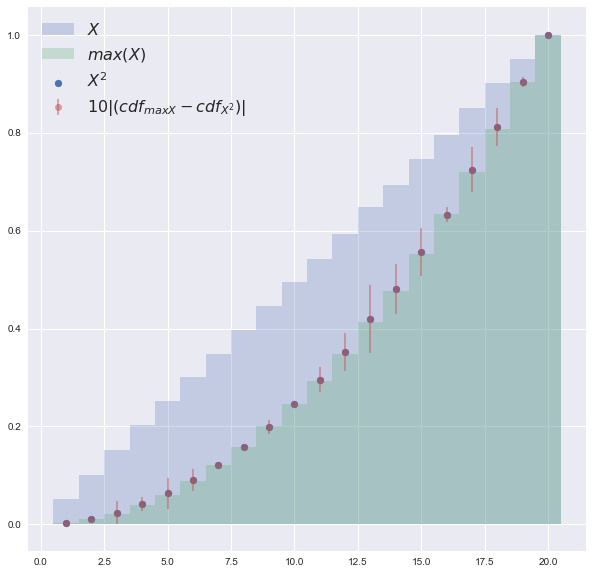

In [160]:
import seaborn as sns
sns.set()
np.random.seed(42)

N = 10**4
sided_dice = 20

X = np.random.randint(1,sided_dice+1,N)
maxX = np.random.randint(1,sided_dice+1,2*N).reshape(-1,2).max(axis=1)


plt.figure(figsize=(10,10))

bins = np.arange(.5,sided_dice+1,1)

histX = plt.hist(X,cumulative=True,alpha=0.25,bins=bins,normed=True,label=r'$X$')
histMax = plt.hist(maxX,cumulative=True,alpha=0.25,bins=bins,normed=True,label=r'$max(X)$')

cdfX2 = [x**2 for x in histX[0]]

histX2 = plt.scatter(np.arange(1,sided_dice+1,1), cdfX2, label=r'$X^2$')
plt.errorbar(np.arange(1,sided_dice+1,1), cdfX2, yerr=(histMax[0] - cdfX2)*10, 
             fmt='o',alpha=0.5, label=r'$10|(cdf_{maxX}-cdf_{X^2})|$')

plt.legend(fontsize=16)
plt.show()

### 2-5. $\textit{[5]}$ If two binary random variables $X$ and $Y$ are independent, are $\overline{X}$ (the complement of $X$) and $Y$ also independent? Give a proof or a counterexample.

In [198]:
import pandas as pd

np.random.seed(42)

N = 10**1

X = np.random.randint(2,size=N)
Xbar = np.isin(X,0).astype(int)

Y = np.random.randint(2,size=N)
Ybar = np.isin(Y,0).astype(int)

probX = dict(zip(*np.unique(X, return_counts=True)))
probY = dict(zip(*np.unique(Y, return_counts=True)))

N = float(N)

pX = probX[1] / N
pXbar = probX[0] / N

pY = probY[1] / N
pYbar = probY[0] / N

A = pX * pY
B = (1 - pX) * pY
C = A + B

D = pX * (1 - pY)
E = (1 - pX) * (1 - pY)
F = D + E

G = A+D
H = B+E

pyx = A/G
pyx_ = B/H
py_x = D/G
py_x_ = E/H

print 'showing that X and Y are independent \nsince the values below are equal'
print pX * pyx, pX*pY
print
print 'showing that Xbar and Y are independent \nsince the values below are equal'
print pXbar * pyx_, pXbar * pY

showing that X and Y are independent 
since the values below are equal
0.12 0.12

showing that Xbar and Y are independent 
since the values below are equal
0.28 0.28


# Statistics

### 2-6. $\textit{[3]}$ Compare each pair distribution to decide which one has the greater mean and the greater standard deviation. You do not need to calculate the actual values of $\mu$ and $\sigma$, just how they compare with each other.

a)  

    i. 3,5,5,5,5,8,11,11,11,13

    ii. 3,5,5,5,5,8,11,11,11,20
    
b) 

    i. -20,0,0,0,15,25,30,30
    
    ii. -40,0,0,0,15,25,30,30
    
c) 

    i. 0,2,4,6,8,10
    
    ii. 20,22,24,26,28,30
    
d)

    i. 100,200,300,400,500
    
    ii. 0,50,300,550,600

In [215]:
ai = np.array([3,5,5,5,5,8,11,11,11,13])
aii = np.array([3,5,5,5,5,8,11,11,11,20])

bi = np.array([ -20,0,0,0,15,25,30,30])
bii = np.array([-40,0,0,0,15,25,30,30])

ci = np.array([ 0,2,4,6,8,10])
cii = np.array([20,22,24,26,28,30])

di = np.array([100,200,300,400,500])
dii = np.array([0,50,300,550,600])

i = [ai,bi,ci,di]
ii = [aii,bii,cii,dii]

for x,y in zip(i,ii):
    print x
    print 'mean: {}, std {}'.format(x.mean(), x.std())
    print
    print y
    print 'mean: {}, std {}'.format(y.mean(), y.std())
    print '------------------------'
    print '------------------------'

[ 3  5  5  5  5  8 11 11 11 13]
mean: 7.7, std 3.34813380856

[ 3  5  5  5  5  8 11 11 11 20]
mean: 8.4, std 4.8
------------------------
------------------------
[-20   0   0   0  15  25  30  30]
mean: 10.0, std 16.7705098312

[-40   0   0   0  15  25  30  30]
mean: 7.5, std 21.7944947177
------------------------
------------------------
[ 0  2  4  6  8 10]
mean: 5.0, std 3.41565025532

[20 22 24 26 28 30]
mean: 25.0, std 3.41565025532
------------------------
------------------------
[100 200 300 400 500]
mean: 300.0, std 141.421356237

[  0  50 300 550 600]
mean: 300.0, std 246.981780705
------------------------
------------------------


### 2-7. $\textit{[3]}$ Construct a probability distribution where none of the mass lies within one $\sigma$ of the mean.

In [269]:
# how....

### 2-8. $\textit{[3]}$ How does the arithmetic and geometric mean compare on random integers?

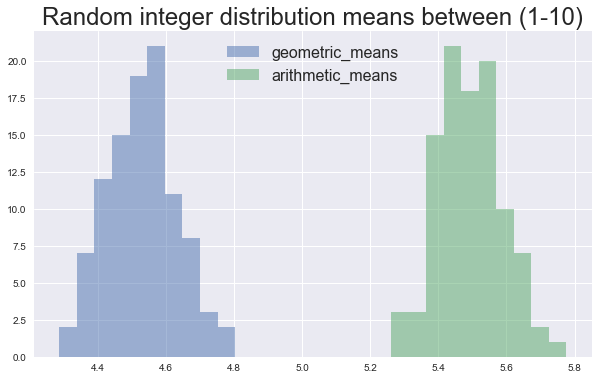

In [294]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 10**3

arithmetic_means = []
geometric_means = []

for j in range(100):
    X = np.random.randint(1,11,size=N)

    arithmetic_mean = X.mean()

    geometric_mean = 1
    for i in range(N):
        geometric_mean *= X[i]**(1./N)

    arithmetic_means.append(arithmetic_mean)
    geometric_means.append(geometric_mean)
    
plt.figure(figsize=(10,6))
plt.title('Random integer distribution means between (1-10)',fontsize=24)
plt.hist(geometric_means, label='geometric_means', alpha=0.5)
plt.hist(arithmetic_means, label='arithmetic_means', alpha=0.5)
plt.legend(fontsize=16)
plt.show()

### 2-9. $\textit{[3]}$ Show that the arithmetic mean equals the geometric mean when all the terms are the same.

## $$\mu_X = \frac{1}{n} \sum^{n}_{i=1} x_i$$ Can be seen to converge to the same value as

## $$\Big(\prod^{n}_{i=1} x_i \Big)^{\frac{1}{n}} = \sqrt[n]{x_1x_2...x_n}$$ When all $x_i$ are the same.

---

# Correlation Analysis

### 2-10. $\textit{[3]}$ True or false: a correlation coefficient of -0.9 indicates a stronger linear relationship than a correlation coeffcient of 0.5. Explain why.

1 or -1 shows perfect positive and negative correlation respectively. If you are to square these values, you recieve the $r^2$ value which a higher value indicates are larger correlation.

### 2-11. $\textit{[3]}$ What would be the correlation coefficient between the annual salaries of college and high school graduates at a given companty, if for each possible job title the college graduates always made:

a) $5,000 more than high school grads?

b) 25% more than high school grads?

c) 15% less than high school grads?

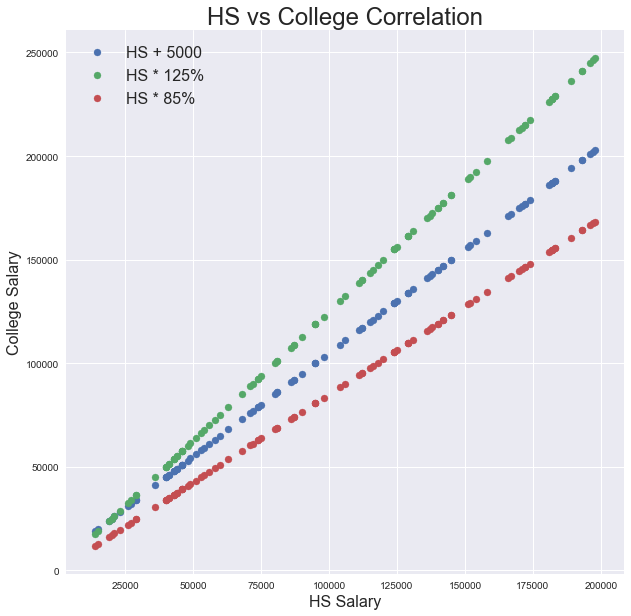

In [331]:
import numpy as np
import pandas as pd
import seaborn as sns

N = 10**2

HSgrads = np.random.randint(10,200,size=N) * 1000

CollegeA = HSgrads + 5000
CollegeB = np.array([1.25*x for x in HSgrads])
CollegeC = np.array([0.85*x for x in HSgrads])


plt.figure(figsize=(10,10))
plt.title('HS vs College Correlation',fontsize=24)

plt.scatter(HSgrads,CollegeA, label='HS + 5000')
plt.scatter(HSgrads,CollegeB, label='HS * 125%')
plt.scatter(HSgrads,CollegeC, label='HS * 85%')


plt.xlabel('HS Salary',fontsize=16)
plt.ylabel('College Salary',fontsize=16)
plt.legend(fontsize=16)
plt.show()

### 2-12. $\textit{[3]}$ What would be the correlation between the ages of husbands and wives if men always married woman who where:

a) Three years younger than themselves?

b) Two years older than themselves?

c) Half as old as themselves?

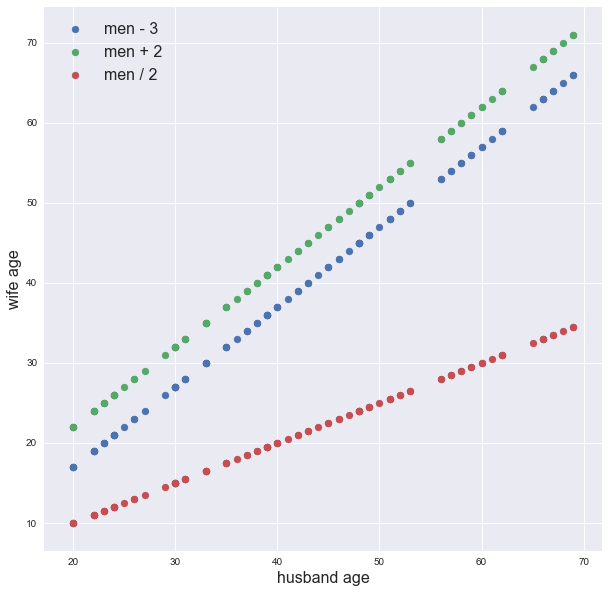

In [333]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10**2

men = np.random.randint(20,70,size=N)

wifeA = men - 3
wifeB = men + 2
wifeC = men / 2.

plt.figure(figsize=(10,10))
plt.scatter(men, wifeA, label='men - 3')
plt.scatter(men, wifeB, label='men + 2')
plt.scatter(men, wifeC, label='men / 2')

plt.xlabel('husband age',fontsize=16)
plt.ylabel('wife age',fontsize=16)
plt.legend(fontsize=16)
plt.show()

### 2-13. $\textit{[5]}$ Use data or literature found in a Google search to estimate/measure the strength of the correlation between:

a) Hits and walks score for hitters in baseball.

b) Hits and walks allowed by pitches in baseball.

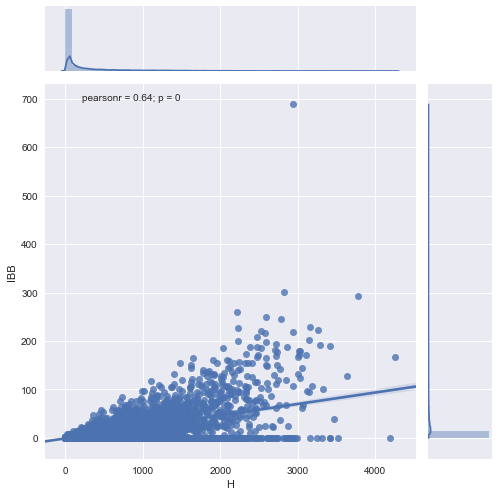

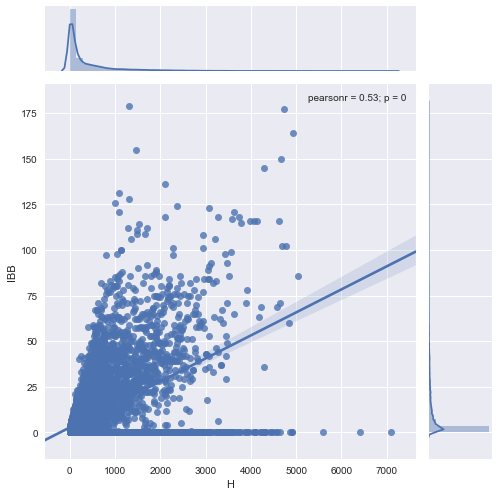

In [380]:
import pandas as pd
import seaborn as sns

# http://www.seanlahman.com/baseball-archive/statistics/
filepath = 'Datasets/baseballdatabank-seanlahman/core/'

# H = hits, IIB = intentional walks, playerID
Batting = pd.DataFrame(pd.read_csv(filepath + 'Batting.csv'))

# H = hits, W = walks, IIB = intentional walks, playerID
Pitching = pd.DataFrame(pd.read_csv(filepath + 'Pitching.csv'))

Batting = Batting.loc[:,['H','IBB','playerID']].fillna(0)
Pitching = Pitching.loc[:,['H','IBB','playerID']].fillna(0)

bat = Batting.groupby('playerID').sum()
pit = Pitching.groupby('playerID').sum()



sns.jointplot("H","IBB",data=bat,kind='reg',size=7)
sns.jointplot("H","IBB",data=pit,kind='reg',size=7)
plt.show()

### 2-14. $\textit{[5]}$ Compute the Pearon and Spearman Rank correlations for uniformly drawn samples of points $(x,x^k)$. How do these values change as a function of increasing k?

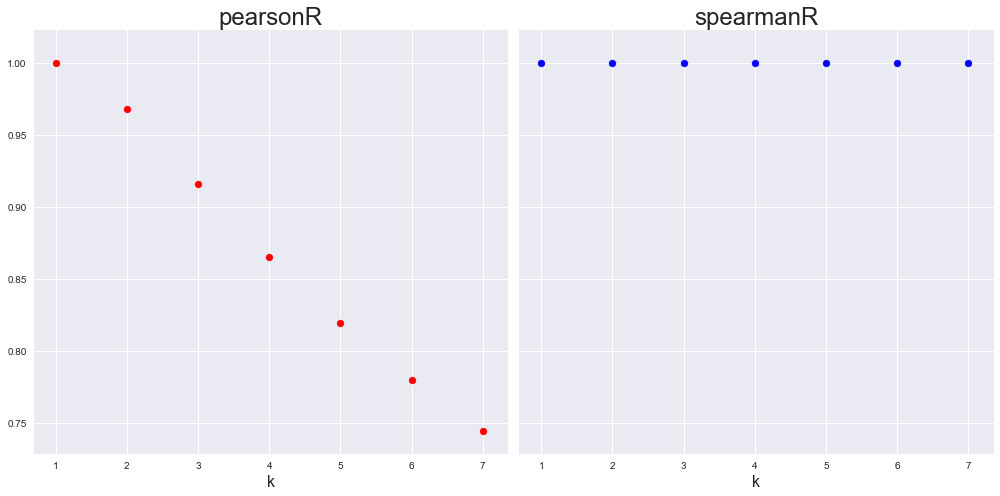

In [413]:
from scipy.stats import spearmanr, pearsonr
import numpy as np

N = 10**4

X = np.random.rand(N)

fig, ax = plt.subplots(1,2, figsize=(14,7),sharey=True)

ax[0].set_title('pearsonR',fontsize=24)
ax[1].set_title('spearmanR',fontsize=24)

for k in range(1,8):
    y = np.array([x**k for x in X])
    sr = spearmanr(X,y)[0]
    pr = pearsonr(X,y)[0]
    ax[0].scatter(k,pr,c='r')
    ax[1].scatter(k,sr,c='b')
    
ax[0].set_xlabel('k',fontsize=16)
ax[1].set_xlabel('k',fontsize=16)
plt.tight_layout()
plt.show()

# Logarithms
---

### 2-15. $\textit{[3]}$ Show that the logarithm of any number less than 1 is negative.

### 2-16. $\textit{[3]}$ Show that the logarithm of zero is undefined.

### 2-17. $\textit{[5]}$ Prove that

## $$x*y = b^{log_b(x)+log_b(y)}$$

### 2-18. $\textit{[5]}$ Prove the correctness of the formula for chaning a base-b logarithm to base-a, that

## $$log_a(x)=\frac{log_b(x)}{log_b(a)} $$

# Implementation Projects
---

### 2-19. $\textit{[3]}$ Find some interesting data set, and compare how similar their means and medians are. What are the distributions where the mean and median differ on the most?

### 2-20. $\textit{[3]}$ Find some interesting data sets and search all pairs for interesting correlations. Perhaps start with what is available at http://www.data-manual.com/data. What do you find?

# Interview Questions
---

### 2-21. $\textit{[3]}$ What is the probability of getting exactly $k$ heads on n tosses, where the coin has a probability of $p$ in coming up heads on each toss? What about $k$ or more heads?

### 2-22. $\textit{[5]}$ Suppose that the probability of geatting a head on the $i$th toss of an ever-changing coin is $f(i)$. How would you efficiently compute the probability of getting exactly $k$ heads in $n$ tosses?

### 2-23. $\textit{[5]}$ At halftime of a basketball game you are offered two possible challenges:

a) Take three shots, and make at least two of them.

b) Take eight shots, and make at least five of them.

What challenge should you pick to have a better chance of winning the game?

### 2-24. $\textit{[3]}$ Tossing a coin ten times results in eight heads and two tails. How you would analyze whether a coin is fair? What is the $p$-value?

### 2-25. $\textit{[5]}$ Given a stream of $n$ numbers, show how to select one uniformly at random using only constant storage. What if you don't know $n$ in advance?

### 2-26. $\textit{[5]}$ A $k$-streak starts at toss $i$ in a squence of $n$ coin flips when the outcome of the $i$th flip and the next $k-1$ flips are identical. For example, sequence HTTHH contains 2-streaks starting at the second, third, and fifth tosses. What are the expected number of $k$-streaks that you will see in $n$ tosses of a fair coin ?

### 2-27. $\textit{[5]}$ A person randomly types an eight-digit number into a pocket calculator. What is the probability that the number looks the same even if the calculator is turned upside down?

### 2-28. $\textit{[3]}$ You play a dice rolling game where you have two choice:

a) Roll the dice once and get rewarded with a prize equal to the outcome number (e.g. $3 for number "3") and then stop the game.

b) You can reject the first reward according to its outcome and roll the dice a second time, and get rewarded in the same way.

Which strategy should you choose to maximize your reward? That is, for what outcomes of the first roll should you chose to play the second game? What is the statistical expectation of reward if you choose the second strategy?

### 2-29. $\textit{[3]}$ What is A/B testing and how does it work?

### 2-30. $\textit{[3]}$ What is the difference between statistical independence and correlation?

### 2-31. $\textit{[3]}$ We often say that correlation does not imply causation. What does that mean?

### 2-32. $\textit{[5]}$ What is the difference between a skewed distribution and a uniform one?

# Kaggle Challenges
---

# 2-33. Cause-effect pairs: correlation vs. causation.
- https://www.kaggle.com/c/cause-effect-pairs

# 2-34. Predict the next "random number" in a sequence.
- https://www.kaggle.com/c/random-number-grand-challenge 

# 2-35. Predict the fate of animals at a pet shelter.
- https://www.kaggle.com/c/shelter-animal-outcomes